In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

## 2次元データの例

In [26]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
n_clusters = 3 #クラスタ数

model = KMeans(n_clusters=n_clusters)
model.fit(inputs)
print(model.cluster_centers_) #各クラスタの中心

[[ 18.33333333  19.83333333]
 [-15.88888889 -10.33333333]
 [-43.8          5.4       ]]


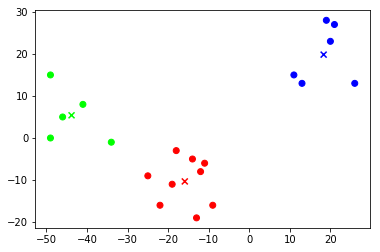

In [36]:
tmp = list(map(lambda x, y : x + [y], inputs, model.labels_))
result = list(zip(*tmp))

plt.scatter(result[0], result[1], c=result[2], cmap="brg")

center_color = range(n_clusters)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c=center_color, cmap="brg")
plt.show()

## iris データセットの例 (Elbow 法によるクラスタ数の探索)

In [7]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
n_clusters = 3
model = KMeans(n_clusters=n_clusters)
model.fit(data.data)
print(model.labels_) #各データが属するクラスタの番号

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


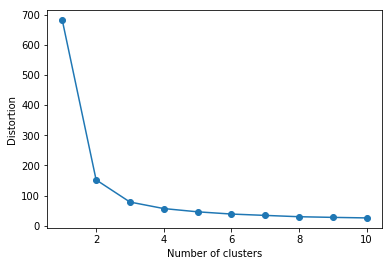

In [9]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data.data)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

上のグラフを見ると、クラスタ数 2～3 までは誤差の二乗和が大きく減少するが、それ以上クラスタ数を増やしてもあまり減少しない。そのため、このデータセットではクラスタ数 2～3 を用いるのが良いと判断できる。

Elbow 法は、このようにグラフの「肘」を視覚的に探すことで、良いクラスタ数を探すものであるが、あくまでも「目安」であり、明確な基準などは存在しない。

## 画像データの例

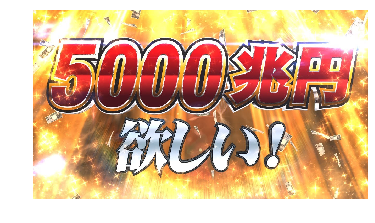

In [17]:
path_to_png_file = "test.png"
img = mpimg.imread(path_to_png_file)
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
pixels = [pixel for row in img for pixel in row]
model = KMeans(n_clusters=5) #上の png カラー画像、元の色を可能な限り維持したまま 5 色で表現する
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
model.cluster_centers_

array([[0.7309844 , 0.32064569, 0.24042452, 1.        ],
       [0.9861309 , 0.91637772, 0.50882596, 1.        ],
       [0.33302133, 0.20271408, 0.19586429, 1.        ],
       [0.95536741, 0.94985066, 0.92001782, 1.        ],
       [0.93319837, 0.63373064, 0.32881249, 1.        ]])

In [24]:
new_img = np.array(list(map(lambda x: model.cluster_centers_[x], model.labels_))) #各クラスタの画素値はクラスタの中心の値とする

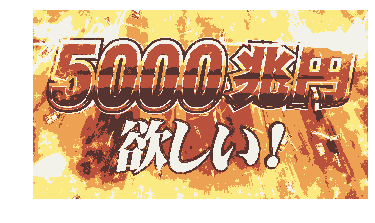

In [25]:
plt.imshow(new_img.reshape(img.shape))
plt.axis('off')
plt.show()

In [ ]:
model.cluster_centers_